### Logistic Regression Using numpy

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import pprint

In [2]:
x=[10, 20, 30, 40, 50, 60, 70]
y=[0, 0, 0, 1, 1, 1, 1]
print(x)
print(y)

[10, 20, 30, 40, 50, 60, 70]
[0, 0, 0, 1, 1, 1, 1]


In [35]:
xx=[ [1.0, float(ix) ] for ix in x]
print(xx)

[[1.0, 10.0], [1.0, 20.0], [1.0, 30.0], [1.0, 40.0], [1.0, 50.0], [1.0, 60.0], [1.0, 70.0]]


In [36]:
X=np.array(xx)
y=np.array(y)
print(X.shape)
print ( type(X))
print(X)

(7, 2)
<class 'numpy.ndarray'>
[[ 1. 10.]
 [ 1. 20.]
 [ 1. 30.]
 [ 1. 40.]
 [ 1. 50.]
 [ 1. 60.]
 [ 1. 70.]]


In [6]:
print(X.shape)

(7, 2)


In [7]:
print(X.shape[0])

7


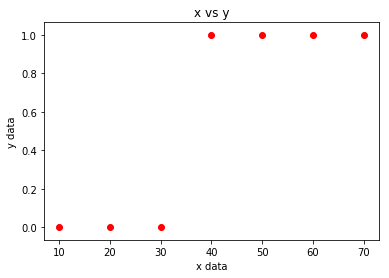

In [8]:
plt.scatter(x, y, color = 'red') 
plt.title('x vs y')
plt.xlabel('x data')
plt.ylabel('y data')
plt.show()

In [15]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))
    
def linRG(x, theta):
    return np.dot(theta, x.T)

def predict(X, theta):
  z = linRG(X, theta)
  return sigmoid(z)

In [16]:
def gradient(x, h, y):
    '''
    #     return (1 / n) * np.dot(x.T, h - y)
    #compute partial derivative for  all( each time ith X (i.e. x1) in each row ) column. to find all thetas gradient. then average.
    #for i=0, X=all rows ith column. this gives a column matrix. where (h-y) is a row matrix.
    '''
    n = x.shape[0]
    return (1 / n) * np.dot( (h - y), X)

def gradient_man(x, h, y):
    '''compute manually. worked!
    '''
    gds=[]
    for icol in range( x.shape[1] ):
#         gd=np.dot( (h-y), x[:,icol])
#         print('gd=',gd)
        gd=0
        for irow in range(x.shape[0]):
            gd+=(h[irow]-y[irow]) *x[irow][icol]
        gda=gd/x.shape[0]
        gds.append(gda)
    
    return gds

def loss(h, y):
    return (- y * np.log(h) - (1 - y ) * np.log(1 - h) ).mean()

In [40]:
# weights initialization
theta = np.zeros(2)
print(theta)

[0. 0.]


In [41]:
print(theta) 
print(X[0], X[0].T)  #Same because transposing 1D array is still 1D

[0. 0.]
[ 1. 10.] [ 1. 10.]


In [43]:
epoch=90000
# epoch=40
lr=0.1
lr=0.01
cost_history=[]

print('training started')
for i in range(epoch):
    h=predict(X, theta) 
    cost=loss(h,y)
    gd=gradient(X, h, y)
    gd2=gradient_man(X,h,y)
    theta = theta-lr * gd
    
    cost_history.append(cost)
    
#     if i % 10000 == 0:
#         print("iter: "+str(i) + " cost: "+str(cost))

print('training completed')

training started
training completed


In [33]:
print(theta)

[-13.47594347   0.38992892]


In [23]:
print(X)
print(X[0,0])
print(X[:,0])

[[ 1. 10.]
 [ 1. 20.]
 [ 1. 30.]
 [ 1. 40.]
 [ 1. 50.]
 [ 1. 60.]
 [ 1. 70.]]
1.0
[1. 1. 1. 1. 1. 1. 1.]


In [24]:
pd=predict(X, theta)
print(pd)

[8.56165004e-10 3.84490213e-06 1.69738945e-02 9.87268217e-01
 9.99997128e-01 9.99999999e-01 1.00000000e+00]


In [25]:
# for ipd in pd:
# #     print( ipd.round()  )
#     if ipd > 0.5:
#         print(1)
#     else:
#         print(0)
prd=[ 1 if ipd>0.5 else 0 for ipd in pd]
print(prd)

[0, 0, 0, 1, 1, 1, 1]


In [44]:
def accuracy(predicted_labels, actual_labels):
    diff = predicted_labels - actual_labels
    return 1.0 - (float(np.count_nonzero(diff)) / len(diff))

In [22]:
accuracy(prd, y)

1.0

In [27]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report 

In [26]:
results = confusion_matrix(y, prd) 
print(results)

[[3 0]
 [0 4]]


In [28]:
print( classification_report(y, prd) )

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         4

   micro avg       1.00      1.00      1.00         7
   macro avg       1.00      1.00      1.00         7
weighted avg       1.00      1.00      1.00         7



In [19]:
nx=np.array([[1 ,55]])
print(nx.shape)

(1, 2)


In [20]:
fp=predict(nx, theta)
print(fp , fp[0].round())

[0.99965449] 1.0


In [29]:
print(cost_history[:10])

[0.004277120964536875, 0.004277117287301942, 0.004277113610073303, 0.004277109932850914, 0.0042771062556347895, 0.004277102578424993, 0.004277098901221446, 0.004277095224024226, 0.00427709154683324, 0.004277087869648487]


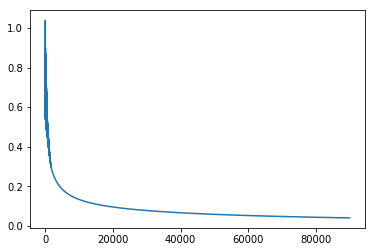

In [34]:
# npt=90000
npt=epoch
plt.plot(cost_history)
plt.show()